In [2]:
pip install joblib


Note: you may need to restart the kernel to use updated packages.


In [5]:
!pip install scikit-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 6.6 MB/s  0:00:01 eta 0:00:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 2.0 MB/s  0:00:10 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [scikit-learn] [scikit-learn]


In [6]:
#system Handling
import os
import warnings
import joblib # => model deployment

#Data Handling & Vasualization
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
#Machine Learning Library
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [7]:
df = pd.read_csv('Final_data.csv')

In [8]:
df.head()


,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,...,cal_from_macros,pct_carbs,protein_per_kg,pct_HRR,pct_maxHR,cal_balance,lean_mass_kg,expected_burn,Burns Calories (per 30 min)_bc,Burns_Calories_Bin
0,34.91,Male,65.27,1.62,188.58,157.65,69.05,1.00,1080.90,Strength,...,2139.59,0.500432,1.624789,0.741237,0.835985,725.10,47.777394,685.1600,7.260425e+19,Medium
1,23.37,Female,56.41,1.55,179.43,131.75,73.18,1.37,1809.91,HIIT,...,1711.65,0.500850,1.514093,0.551247,0.734270,-232.91,40.809803,978.6184,1.020506e+20,High
2,33.20,Female,58.98,1.67,175.04,123.95,54.96,0.91,802.26,Cardio,...,1965.92,0.500610,1.663445,0.574534,0.708124,805.74,44.635580,654.5266,1.079607e+20,High
3,38.69,Female,93.78,1.70,191.21,155.10,50.07,1.10,1450.79,HIIT,...,1627.28,0.499533,0.862017,0.744155,0.811150,1206.21,63.007432,773.6300,8.987921e+19,High
4,45.09,Male,52.42,1.88,193.58,152.88,70.84,1.08,1166.40,Strength,...,2659.23,0.500581,2.538153,0.668405,0.789751,303.60,43.347504,711.4176,5.264685e+19,Low


In [9]:
df.info() #checking the data types and null values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 54 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             20000 non-null  float64
 1   Gender                          20000 non-null  object 
 2   Weight (kg)                     20000 non-null  float64
 3   Height (m)                      20000 non-null  float64
 4   Max_BPM                         20000 non-null  float64
 5   Avg_BPM                         20000 non-null  float64
 6   Resting_BPM                     20000 non-null  float64
 7   Session_Duration (hours)        20000 non-null  float64
 8   Calories_Burned                 20000 non-null  float64
 9   Workout_Type                    20000 non-null  object 
 10  Fat_Percentage                  20000 non-null  float64
 11  Water_Intake (liters)           20000 non-null  float64
 12  Workout_Frequency (days/week)   

In [11]:
def health_recommendation_system(user):
    recommendations = []
    score = 0  # out of 10
    
    # 🎯 BMI Analysis
    if user['BMI'] < 18.5:
        recommendations.append("🍽️ Increase calorie intake with balanced protein meals (underweight).")
        score += 6
    elif user['BMI'] <= 24.9:
        recommendations.append("✅ Your BMI is in a healthy range — maintain your current diet and activity.")
        score += 9
    elif user['BMI'] >= 30.0:
        recommendations.append("⚠️ Slightly overweight — focus on moderate cardio and portion control.")
        score += 7
    else:
        recommendations.append("🔥 High BMI — increase cardio sessions and reduce high-fat/sugar meals.")
        score += 5
    
    # 💧 Water Intake
    if user['Water_Intake (liters)'] < 1.5:
        recommendations.append("💧 Increase water intake to at least 2.5 liters per day.")
        score += 5
    elif user['Water_Intake (liters)'] < 2.5:
        recommendations.append("🥤 Drink slightly more water, aim for 2.5L daily.")
        score += 7
    else:
        recommendations.append("💧 Excellent hydration habits!")
        score += 9
    
    # 🏋️ Workout Frequency
    if user['Workout_Frequency (days/week)'] < 2:
        recommendations.append("🚶‍♂️ Start exercising at least 3 times a week.")
        score += 5
    elif user['Workout_Frequency (days/week)'] < 4:
        recommendations.append("💪 Good activity level, try to increase intensity gradually.")
        score += 8
    else:
        recommendations.append("🔥 Great consistency! Maintain your routine.")
        score += 10

    # 🧠 Physical Exercise Type
    if "cardio" in str(user['Physical exercise']).lower():
        recommendations.append("❤️ Excellent — cardio improves heart and stamina.")
        score += 9
    elif "strength" in str(user['Physical exercise']).lower():
        recommendations.append("🏋️ Strength training builds long-term metabolism — keep it up!")
        score += 9
    else:
        recommendations.append("🧘 Add variety — mix cardio, flexibility, and strength workouts.")
        score += 7

    # 🍱 Meal Frequency
    meals = user['Daily meals frequency']
    if meals < 3:
        recommendations.append("🍎 Increase to 3–5 balanced meals daily to stabilize metabolism.")
        score += 6
    elif meals <= 5:
        recommendations.append("🥗 Perfect meal frequency — keep meals balanced with proteins and veggies.")
        score += 9
    else:
        recommendations.append(" Too frequent meals — may increase caloric load, try to space them out.")
        score += 6

    # 🧾 Final Lifestyle Score
    lifestyle_score = round(score / 5, 2)
    recommendations.append(f" Estimated Lifestyle Score: {lifestyle_score}/10")

    # 🧭 Summary Recommendation
    if lifestyle_score >= 8:
        recommendations.append("🌟 You’re maintaining a healthy lifestyle! Continue consistency.")
    elif lifestyle_score >= 6:
        recommendations.append("Good progress! Focus on minor improvements in hydration or exercise.")
    else:
        recommendations.append(" Needs attention — adjust nutrition, water, and activity levels.")

    return recommendations ,lifestyle_score

In [12]:
def visualize_health_profile(user, lifestyle_score):
    categories = ['BMI', 'Water Intake', 'Workout Frequency', 'Meal Frequency']
    values = [
        np.clip((25 - abs(user['BMI'] - 22)) / 25 * 10, 0, 10),  # ideal BMI ~22
        np.clip(user['Water_Intake (liters)'] / 2.5 * 10, 0, 10), # ideal water 2.5L
        np.clip(user['Workout_Frequency (days/week)'] / 5 * 10, 0, 10), # ideal 4-5 days
        np.clip(user['Daily meals frequency'] / 4 * 10, 0, 10) # ideal 3-5 meals
    ]

    plt.figure(figsize=(8, 5))
    bars = plt.bar(categories, values, color=['#66b3ff', '#99ff99', '#ffcc99', '#ff9999'])
    plt.ylim(0, 10)
    plt.title(f'🏋️‍♀️ Health Profile Score (Lifestyle = {lifestyle_score}/10)', fontsize=14, fontweight='bold')
    plt.ylabel("Health Level (0–10)")
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Annotate bars
    for bar, val in zip(bars, values):
        plt.text(bar.get_x() + bar.get_width() / 2, val + 0.3, f'{val:.1f}', ha='center', fontsize=10)
    plt.show()

In [13]:
# Example user data
user = {
    'Age': 28,
    'Gender': 'Male',
    'BMI': 27.5,
    'Fat_Percentage': 22,
    'Workout_Frequency (days/week)': 2,
    'Physical exercise': 'Cardio & Stretching',
    'Water_Intake (liters)': 1.4,
    'Daily meals frequency': 2
}

recommendations, lifestyle_score = health_recommendation_system(user)

print("💡 Personalized Health Recommendations:\n")
for rec in recommendations:
    print("-", rec)

💡 Personalized Health Recommendations:

- 🔥 High BMI — increase cardio sessions and reduce high-fat/sugar meals.
- 💧 Increase water intake to at least 2.5 liters per day.
- 💪 Good activity level, try to increase intensity gradually.
- ❤️ Excellent — cardio improves heart and stamina.
- 🍎 Increase to 3–5 balanced meals daily to stabilize metabolism.
-  Estimated Lifestyle Score: 6.6/10
- Good progress! Focus on minor improvements in hydration or exercise.


/opt/miniconda3/envs/jupyterfix/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127947 (\N{WEIGHT LIFTER}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


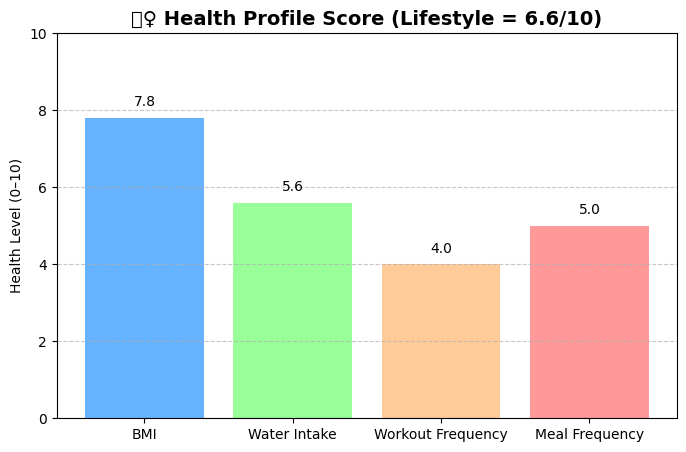

In [14]:
## Visualize Health Profile
visualize_health_profile(user, lifestyle_score)


💡 Personalized Health Recommendations:

- ✅ Your BMI is in a healthy range — maintain your current diet and activity.
- 💧 Excellent hydration habits!
- 🔥 Great consistency! Maintain your routine.
- 🏋️ Strength training builds long-term metabolism — keep it up!
- 🥗 Perfect meal frequency — keep meals balanced with proteins and veggies.
-  Estimated Lifestyle Score: 9.2/10
- 🌟 You’re maintaining a healthy lifestyle! Continue consistency.


/opt/miniconda3/envs/jupyterfix/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127947 (\N{WEIGHT LIFTER}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


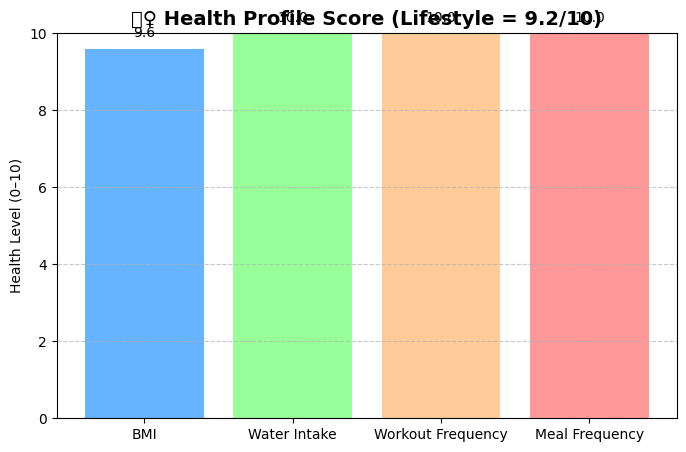

In [16]:
## anpother user data
user = {
    'Age': 35,
    'Gender': 'Female',
    'BMI': 23.0,  
    'Fat_Percentage': 18,
    'Workout_Frequency (days/week)': 5,
    'Physical exercise': 'Strength Training',
    'Water_Intake (liters)': 2.8,
    'Daily meals frequency': 4
}
recommendations, lifestyle_score = health_recommendation_system(user)
print("💡 Personalized Health Recommendations:\n")
for rec in recommendations:
    print("-", rec)
## Visualize Health Profile
visualize_health_profile(user, lifestyle_score)

💡 Personalized Health Recommendations:

- ⚠️ Slightly overweight — focus on moderate cardio and portion control.
- 💧 Increase water intake to at least 2.5 liters per day.
- 🚶‍♂️ Start exercising at least 3 times a week.
- 🧘 Add variety — mix cardio, flexibility, and strength workouts.
- 🍎 Increase to 3–5 balanced meals daily to stabilize metabolism.
-  Estimated Lifestyle Score: 6.0/10
- Good progress! Focus on minor improvements in hydration or exercise.


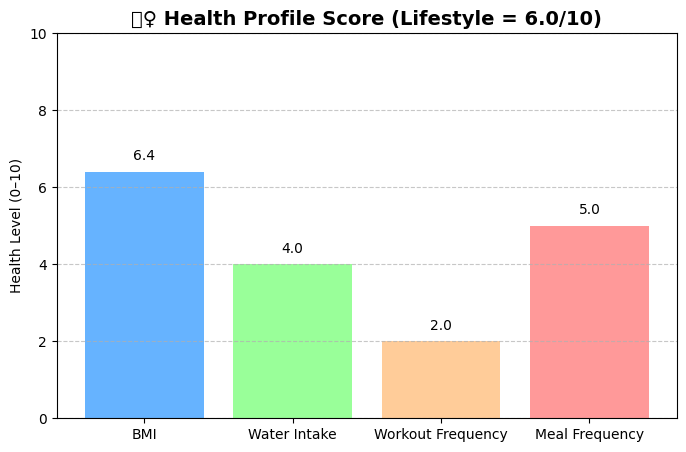

In [20]:
## predicting for another user using random forest model
user = {
    'Age': 45,
    'Gender': 'Male',
    'BMI': 31.0,
    'Fat_Percentage': 28,
    'Workout_Frequency (days/week)': 1,
    'Physical exercise': 'None',
    'Water_Intake (liters)': 1.0,
    'Daily meals frequency': 2
}
recommendations, lifestyle_score = health_recommendation_system(user)
print("💡 Personalized Health Recommendations:\n")
for rec in recommendations:
    print("-", rec)
## Visualize Health Profile
visualize_health_profile(user, lifestyle_score)

In [22]:
!pip install xgboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 10.3 MB/s  0:00:00


In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

df = pd.read_csv('Final_data.csv')

target = 'Burns_Calories_Bin'

# Encode categorical
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

X = df.drop(columns=[target])
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

results = {}



In [29]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=2000)
log_reg.fit(X_train, y_train)

y_pred_lr = log_reg.predict(X_test)

print("Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("F1 Score:", f1_score(y_test, y_pred_lr, average='weighted'))


Logistic Regression Results:
Accuracy: 0.2595
F1 Score: 0.10693171893608575


In [30]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print("\nRandom Forest Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf, average='weighted'))



Random Forest Results:
Accuracy: 1.0
F1 Score: 1.0


In [28]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='mlogloss'
)

xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

print("\nXGBoost Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("F1 Score:", f1_score(y_test, y_pred_xgb, average='weighted'))



XGBoost Results:
Accuracy: 0.9955
F1 Score: 0.9955011904897753


In [31]:
models = {
    "Logistic Regression": (accuracy_score(y_test, y_pred_lr), f1_score(y_test, y_pred_lr, average='weighted')),
    "Random Forest": (accuracy_score(y_test, y_pred_rf), f1_score(y_test, y_pred_rf, average='weighted')),
    "XGBoost": (accuracy_score(y_test, y_pred_xgb), f1_score(y_test, y_pred_xgb, average='weighted'))
}

for m, scores in models.items():
    print(f"{m}: Accuracy={scores[0]:.4f}, F1 Score={scores[1]:.4f}")


Logistic Regression: Accuracy=0.2595, F1 Score=0.1069
Random Forest: Accuracy=1.0000, F1 Score=1.0000
XGBoost: Accuracy=0.9955, F1 Score=0.9955


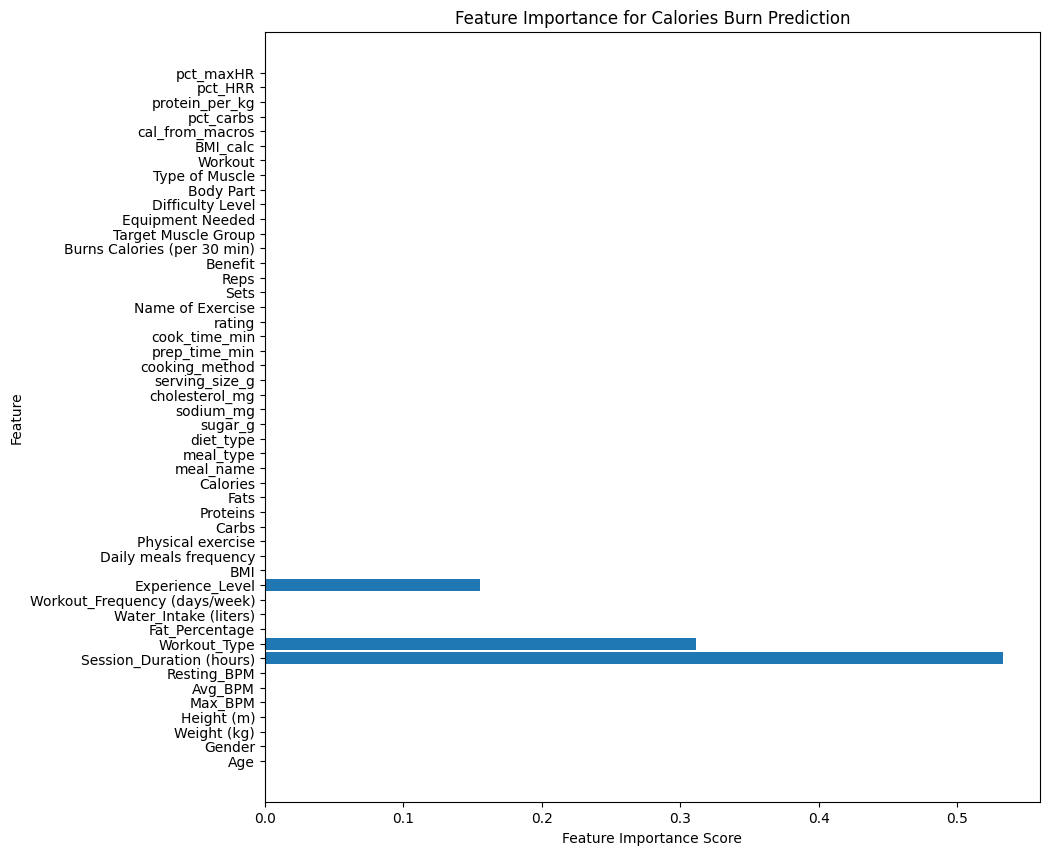

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt


# Target for feature importance
target = 'Calories_Burned'

# Columns to remove to avoid target leakage
leak_cols = [
    'Burns_Calories_Bin',
    'expected_burn',
    'cal_balance',
    'lean_mass_kg',
    'Burns Calories (per 30 min)_bc'
]

for col in leak_cols:
    if col in df.columns:
        df = df.drop(columns=[col])

# Encode categorical variables
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

# Split features and target
X = df.drop(columns=[target])
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# RandomForest for feature importance
model = RandomForestRegressor(n_estimators=120, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)

# Get importances
importances = model.feature_importances_
feature_names = X.columns

# Create bar plot (no custom colors)
plt.figure(figsize=(10, 10))
plt.barh(feature_names, importances)
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importance for Calories Burn Prediction")
plt.show()
